# Pooling strategies to reduce mean test counts.

Pooling can be used to screen a large group of people all at one time for illness.  If the group comes back negative, then they can all be ruled out for having the disease after just one test.  If it comes back positive, refined testing of the group is needed to determine which are ill.  Here, we consider two alternatives for this refined search process:  (1) a bisection approach and (2) a simple approach. In the bisection method, we split the group into two and test each subgroup.  If either half tests negative, we can rule out that half.  Otherwise, we split it again in two, etc.  In this way we can identify exactly which people have the disease.  In the simple method, we simply skip to testing each individual when the initial group comes back positive. 

Our aim is to see which performs best in the sense of reducing the mean number of tests required.  This depends sensitively on the fraction of people in the testing population who have the disease.  If it is a large fraction, pooling does not help.  If p = 0.1, (perhaps typical for people who show up with symptoms), then we can cut the test count by about half and both methods work ok.  If p << 1, then we can get a dramatic reduction in test count needed and the bisection method works best.

Jonathan Landy, March 29, 2020.


## Code to get best pooling result

Populating the interactive namespace from numpy and matplotlib
Bisection: fraction of full testing: 0.43
Simple: fraction of full testing: 0.84


Text(0,0.5,'mean tests / pooling size')

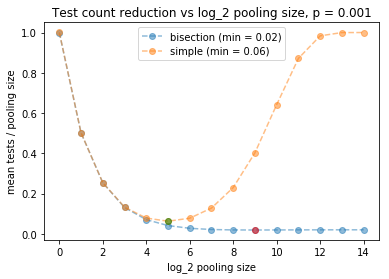

In [8]:
import numpy as np
%pylab inline

K = 5
P_POSITIVE = 0.05

def theory_bisection(p=P_POSITIVE, K=K):
    count = 1 + 2 * np.sum([2 ** k * (1 - (1 - p) ** (2 ** (K - k))) for k in range(K)] )
    return count / 2 ** K

def theory_simple(p=P_POSITIVE, K=K):
    n = 2 ** K
    p0 = (1 - p) ** n
    count = 1 * p0 + (1 + n) * (1 - p0)
    return count / n

print 'Bisection: fraction of full testing: %2.2f' % (theory_bisection())
print 'Simple: fraction of full testing: %2.2f' % (theory_simple())

p = 0.001
data = [theory_bisection(p, k) for k in range(15)]
min_index = np.argmin(data)
plot(data, 'o--', label='bisection (min = %2.2f)'%data[min_index], alpha=0.5)
plot(min_index, data[min_index], 'ro',alpha=0.5)

data = [theory_simple(p, k) for k in range(15)]
min_index = np.argmin(data)
plot(data, 'o--', label='simple (min = %2.2f)'%data[min_index],alpha=0.5)
plot(min_index, data[min_index], 'go',alpha=0.5)
plt.legend()
plt.title('Test count reduction vs log_2 pooling size, p = %0.3f' %p)
plt.xlabel('log_2 pooling size')
plt.ylabel('mean tests / pooling size')

# Sample to get histogram, confirm theoretical forms

In [31]:
def test_count(sequence):
    """
    Recursively check the number of tests required to find all
    positive cases in a given sequence.
    
    inputs
    ------
    sequence : list
        List of 0,1 values with 0 = no disease, 1 = disease.
        The ith element is the hidden result for the ith person.
    """
    #print sequence
    test_size = len(sequence)
    if np.log2(test_size) != np.log2(test_size) // 1.0:
        msg = 'Sequence must have a power of two length.'
        raise ValueError(msg) 
    
    # if just one person left, must test
    if test_size == 1:
        return 1
    
    # more than one person case:
    if 1 not in sequence:
        # no positives on this test, so no 'children' tests
        return 1
    else:
        # at least one positive, must test two children
        left_count = test_count(sequence[:test_size//2])
        right_count = test_count(sequence[test_size//2:])
        return 1 + left_count + right_count

# create an example sequence:
K = 9
seq = [0 for i in range(2 ** K)]
seq[12] = 1
print 'total size = %i' % len(seq)
test_count(seq)

total size = 512


19

In [32]:
# now we will generate many fake samples with a given p value

def generate_random_seq(p=P_POSITIVE, K=K):
    a = [0, 1]
    seq = np.random.choice(a=a, size=2**K, p=[1 - p, p])
    return seq

checks = 10000
test_counts_needed = []
for _ in range(checks):
    seq = generate_random_seq(p=0.001, K=9)
    test_counts_needed.append(test_count(seq))

Populating the interactive namespace from numpy and matplotlib


Text(0.5,1,'Histogram of needed test counts, p=0.001, K=9')

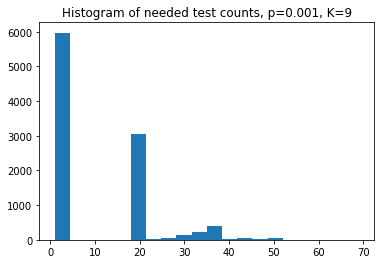

In [34]:
plt.hist(test_counts_needed, bins=20)
plt.title('Histogram of needed test counts, p=%0.3f, K=%i'%(p, K))